In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def show(y: list[float], x: list[float], title: str="", xlabel: str="x", ylabel: str="y(x)"):
    plt.figure(dpi=150)
    plt.title(title)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.plot(y, x, color="blue")

    plt.grid()
    plt.minorticks_on()
    plt.grid(which="minor")

    plt.tight_layout()
    plt.show()

In [4]:
# Constants
EPSILON = 1e-3
h = 1e-3
dx = 1e-3

## Задача XI.9.3

$$
\begin{cases}
    y^{''} - x\sqrt{y} = 0 \text{, } 0 \le x \le 1 \\

    y(0) = 0 \text{, } y(1) = 2
\end{cases}
$$

### Метод Стрельбы

Задача Коши 2-ого порядка:
$$
\begin{cases}
    y^{''} = x\sqrt{y} \\

    y(0) = 0 \\

    y^{'}(1) = \alpha 
\end{cases}
$$

Замена:
$$
\begin{cases}
    y_1 = y \\
    y_2 = y^{'}
\end{cases}
$$

Итог:
$$
\begin{cases}
    y_1^{'} = y_2 \\
    y_2^{'} = x\sqrt{y_1} \\
    y_1(0) = 0 \\
    y_2(0) = \alpha
\end{cases}
$$

In [43]:
def system4shooting(y2: float) -> tuple[list]:
    global dx
    y1 = 0.0
    
    arr_x, arr_y1 = list(), list()
    
    for x in np.arange(0.0, 1.0, dx):
        y1_k1 = y2
        y2_k1 = y1**0.5
    
        y1_k2 = y2 + (dx/2) * y1_k1
        y2_k2 = (y1 + dx/2)**0.5 + (dx/2) * y2_k1
    
        y1_k3 = y2 + (dx/2) * y1_k2
        y2_k3 = (y1 + dx/2)**0.5 + (dx/2) * y2_k2
    
        y1_k4 = y2 + dx * y1_k3
        y2_k4 = (y1 + dx/2)**0.5 + (dx/2) * y2_k3
        
        y1 += (dx/6) * (y1_k1 + 2 * y1_k2 + 2 * y1_k3 + y1_k4)
        y2 += (dx/6) * (y2_k1 + 2 * y2_k2 + 2 * y2_k3 + y2_k4)
        
        arr_x.append(x)
        arr_y1.append(y1)
        
    
    return (arr_x, arr_y1)


def shooting_method(a: float) -> tuple[list]:
    global EPSILON

    arr_x, arr_y = system4shooting(a)
    f = arr_y[-1] - 2

    while abs(f) >= EPSILON:
        arr_x, arr_y = system4shooting(a + h)
        f_derivative = arr_y[-1] - 2
        
        a -= (f * h) / (f_derivative - f)
        
        arr_x, arr_y = system4shooting(a)
        f = arr_y[-1] - 2

    arr_x, arr_y = system4shooting(a)

    return (arr_x, arr_y)

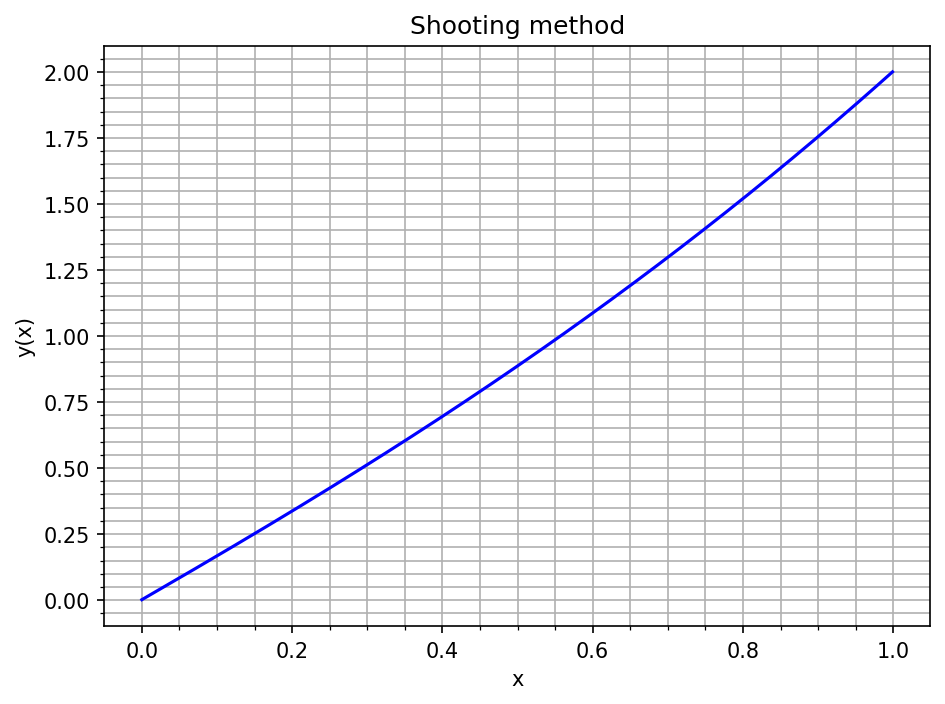

In [44]:
x, y = shooting_method(0)
show(x, y, title="Shooting method", xlabel="x", ylabel="y(x)")

### Метод квазилинеаризации

$$
\begin{cases}
    y(x) = y_0(x) + w(x) \\
    y_0(0) = 0 \\
    y_0(1) = 2 
\end{cases}
$$

Пусть $ y_0(x) = 2x $, тогда

$$
\begin{cases}
    w^{''} = \frac{xw}{2\sqrt{2x + w}} + x\sqrt{2x + w} \\
    w(0) = 0 \\
    w(1) = 0 
\end{cases}
$$

Задача Коши 2-ого порядка:

$$
\begin{cases}
    w^{''} = \frac{xw}{2\sqrt{2x + w}} + x\sqrt{2x + w} \\
    w(0) = 0 \\
    w^{'}(1) = \alpha
\end{cases}
$$

Замена:

$$
\begin{cases}
    w_1 = w \\
    w_2 = w^{'}
\end{cases}
$$

Итог:

$$
\begin{cases}
    w_1^{'} = w_2 \\
    w_2^{'} = \frac{xw_1}{2\sqrt{2x + w_1}} + x\sqrt{2x + w_1} \\
    w_1(0) = 0 \text{, } w_2(0) = \alpha
\end{cases}
$$

In [45]:
def system4quasilin(w2: float) -> tuple[list]:
    global dx
    w1 = 1e-6
    
    arr_x, arr_w1 = list(), list()
    
    for x in np.arange(0.0, 1.0, dx):
        w1_k1 = w2
        w2_k1 = (x * w1) / (2 * ((2 * x + w1)**0.5)) + x * ((2 * x + w1)**0.5)
    
        w1_k2 = w2 + (dx/2) * w1_k1
        w2_k2 = ((x + (dx/2)) * (w1 + (dx/2) * w2_k1)) / (2 * ((2 * (x + (dx/2)) + (w1 + (dx/2) * w2_k1))**0.5)) + (x + (dx/2)) * ((2 * (x + (dx/2)) + (w1 + (dx/2) * w2_k1))**0.5)
    
        w1_k3 = w2 + (dx/2) * w1_k2
        w2_k3 = ((x + (dx/2)) * (w1 + (dx/2) * w2_k2)) / (2 * ((2 * (x + (dx/2)) + (w1 + (dx/2) * w2_k2))**0.5)) + (x + (dx/2)) * ((2 * (x + (dx/2)) + (w1 + (dx/2) * w2_k2))**0.5)
    
        w1_k4 = w2 + dx * w1_k3
        w2_k4 = ((x + (dx/2)) * (w1 + (dx/2) * w2_k3)) / (2 * ((2 * (x + (dx/2)) + (w1 + (dx/2) * w2_k3))**0.5)) + (x + (dx/2)) * ((2 * (x + (dx/2)) + (w1 + (dx/2) * w2_k3))**0.5)
        
        w1 += (dx/6) * (w1_k1 + 2 * w1_k2 + 2 * w1_k3 + w1_k4)
        w2 += (dx/6) * (w2_k1 + 2 * w2_k2 + 2 * w2_k3 + w2_k4)
        
        arr_x.append(x)
        arr_w1.append(w1)
        
    
    return (arr_x, arr_w1)


def quasilinearization(a: float) -> tuple[list]:
    global EPSILON

    arr_x, arr_w = system4quasilin(a)
    f = arr_w[-1]

    while abs(f) >= EPSILON:
        arr_x, arr_w = system4quasilin(a + h)
        f_derivative = arr_w[-1]
        
        a -= (f * h) / (f_derivative - f)
        
        arr_x, arr_w = system4quasilin(a)
        f = arr_w[-1]

    arr_x, arr_w = system4quasilin(a)

    arr_y0 = 2 * np.array(arr_x)
    arr_y = arr_y0 + arr_w
    
    return (arr_x, arr_y, arr_w)


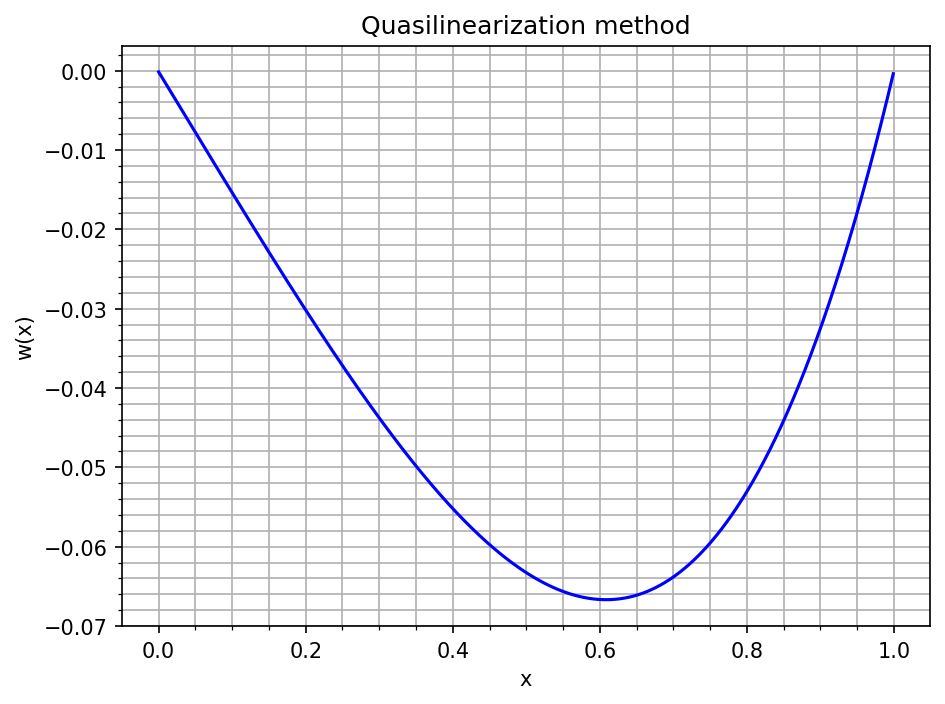

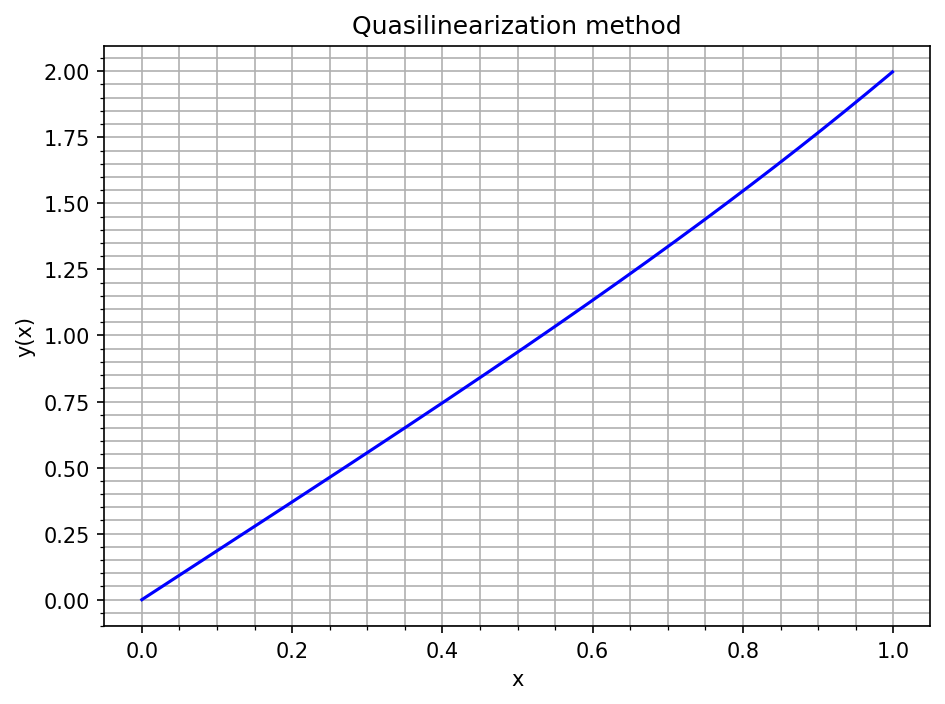

In [46]:
x, y, w = quasilinearization(0)

show(x, w, title="Quasilinearization method", xlabel="x", ylabel="w(x)")
show(x, y, title="Quasilinearization method", xlabel="x", ylabel="y(x)")